In [25]:
# | default_exp utils.Image

In [26]:
# |export
from PIL.Image import Image

In [27]:
# | exporti
from typing import Union
import types
import PIL
import numpy as np

import os
import io
import base64

from nbdev.showdoc import patch_to

In [28]:
# | export
def isBase64(s):
    try:
        return base64.b64encode(base64.b64decode(s)) == s
    except Exception:
        return False


def handle_string_to_bytes_and_decode(data: Union[str, bytes]):

    if isinstance(data, str):
        data = bytes(data)

    if isBase64(data):
        data = base64.b64decode(data)

    return data


def handle_string_to_bytes_and_encode(data: Union[str, bytes]):

    if isinstance(data, str):
        data = bytes(data)

    if not isBase64(data):
        data = base64.b64encode(data)

    return data

In [29]:
# | exports

def to_bytes(self) -> bytes:
    byte_arr = io.BytesIO()

    if not self.area:
        self.area = self
    
    self.area.save(byte_arr, format=self.format)

    self.data = byte_arr.getvalue()

    return self.data

def crop_square(self):

    width, height = self.size  # Get dimensions

    new_edge = min(width, height)

    left = (width - new_edge) / 2
    top = (height - new_edge) / 2
    right = (width + new_edge) / 2
    bottom = (height + new_edge) / 2

    # Crop the center of the image
    self.area = self.crop((left, top, right, bottom))
    
    self.to_bytes()

    return self.area


In [30]:
#| exporti

@patch_to(Image, cls_method=True)
def from_image_file(cls, image_path: str) -> Image:
    if not os.path.exists(image_path):
        raise FileNotFoundError(image_path)

    with open(image_path, "rb") as file:
        data = file.read()

    data = handle_string_to_bytes_and_decode(data)

    im = PIL.Image.open(io.BytesIO(data))

    im.to_bytes = types.MethodType(to_bytes, im)
    im.crop_square = types.MethodType(crop_square, im)

    return im

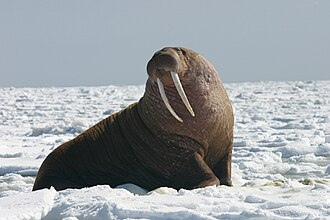

In [31]:
img = Image.from_image_file(image_path="../TEST/image/walrus.jpg")
img

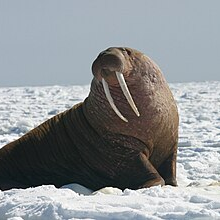

In [32]:
img.crop_square()

In [33]:
#| exporti
@patch_to(Image, cls_method = True)
def from_bytestr(cls, data : Union[str, bytes]) -> Image:

    data = handle_string_to_bytes_and_decode(data)

    im = PIL.Image.open(io.BytesIO(data))

    im.to_bytes = types.MethodType(to_bytes, im)
    im.crop_square = types.MethodType(crop_square, im)


    return im

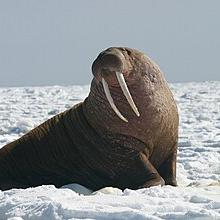

In [34]:
byte_arr = img.to_bytes()

Image.from_bytestr(byte_arr)


In [35]:
#| exports
def are_same_image(image1, image2 , threshold = 0, return_difference: bool = False):
    try:
        img_chop = PIL.ImageChops.difference(image1, image2)

        if return_difference:
            return img_chop

        if np.sum(np.array(img_chop.getdata())) == threshold:
            return True
        return False
    
    except ValueError as e:
         print(e)
         return False


In [39]:
img1 = Image.from_image_file('../TEST/image/cat.png')
img2 = Image.from_image_file('../TEST/image/walrus.jpg')

are_same_image(img1, img2, return_difference= False)

False

In [37]:
# | hide
import nbdev

nbdev.nbdev_export("./Image.ipynb")